# Random walks

Short function definition (one-liner):

In [1]:
jump() = rand( (-1, +1) )

jump (generic function with 1 method)

Exactly the same:

In [2]:
function jump()
    return rand( (-1, +1) )
end 

jump (generic function with 1 method)

In [3]:
jump

jump (generic function with 1 method)

In [11]:
jump()

1

In [12]:
rand( [-1, +1] )

1

In [13]:
t = (-1, +1)

(-1, 1)

In [14]:
typeof(t)

Tuple{Int64,Int64}

In [15]:
t[1] = 10

MethodError: MethodError: no method matching setindex!(::Tuple{Int64,Int64}, ::Int64, ::Int64)

Side remark: Simple bernoulli function:

In [16]:
bernoulli(p) = rand() < p

bernoulli (generic function with 1 method)

In [17]:
bernoulli(0.25)

false

In [18]:
jump()

1

## Random walks

In [19]:
[jump() for i in 1:10]

10-element Array{Int64,1}:
 -1
  1
 -1
  1
 -1
  1
  1
 -1
 -1
  1

In [21]:
function walk(n)
    x = 0
    
    for i in 1:n
        x += jump()   # x = x + jump()
    end
    
    return x
end

walk (generic function with 1 method)

In [86]:
walk(10)

6

In [87]:
function trajectory(n)
    x = 0
    
    xs = [x]
    
    for i in 1:n
        x += jump()   # x = x + jump()
    end
    
    return x
end

trajectory (generic function with 1 method)

In [88]:
v = []

0-element Array{Any,1}

In [89]:
push!(v, 10)

1-element Array{Any,1}:
 10

In [90]:
v

1-element Array{Any,1}:
 10

In [91]:
push!(v, "hellohellohellohellohellohello", 20)

3-element Array{Any,1}:
 10
   "hellohellohellohellohellohello"
 20

In [92]:
v = Int64[]

0-element Array{Int64,1}

In [93]:
push!(v, 10)

1-element Array{Int64,1}:
 10

In [94]:
push!(v, "hello")

MethodError: MethodError: Cannot `convert` an object of type String to an object of type Int64
Closest candidates are:
  convert(::Type{T}, !Matched::T) where T<:Number at number.jl:6
  convert(::Type{T}, !Matched::Number) where T<:Number at number.jl:7
  convert(::Type{T}, !Matched::Ptr) where T<:Integer at pointer.jl:23
  ...

In [95]:
function trajectory(n)
    x = 0
    
    xs = [x]  # try to initialize array with an initial value; 
                # determines the element type of array  
    for i in 1:n
        x += jump()   # x = x + jump()
        
        push!(xs, x)
    end
    
    return xs
end

trajectory (generic function with 1 method)

In [96]:
v = [10]

1-element Array{Int64,1}:
 10

In [97]:
traj = trajectory(100);

## Plotting

In [98]:
plot(traj)

UndefVarError: UndefVarError: plot not defined

In [99]:
using Plots

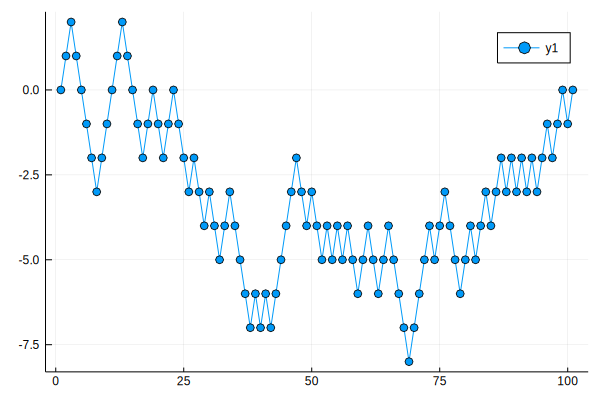

In [100]:
traj = trajectory(100);
plot(traj, m=:o)

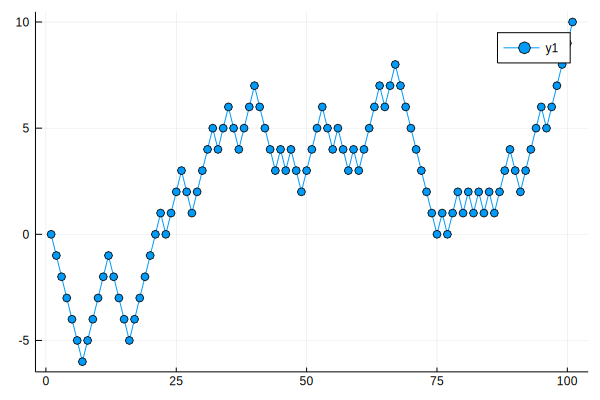

In [101]:
traj = trajectory(100);
plot(traj, m=:o)

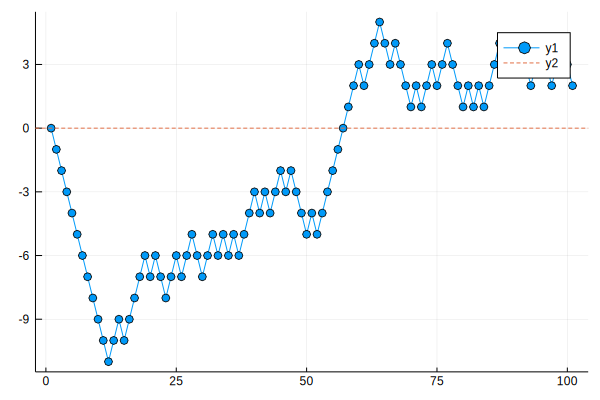

In [110]:
traj = trajectory(100);
plot(traj, m=:o)

hline!([0], ls=:dash)  # ! functions add to the existing plot

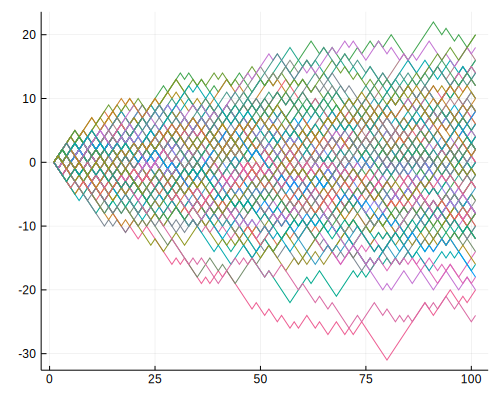

In [112]:
num_walkers = 100
num_steps = 100

p = plot(size=(500, 400), leg=false)

for i in 1:num_walkers
    traj = trajectory(num_steps)
    
    plot!(traj)
end

p

In [2]:
using Interact
using Plots
backend()

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


Plots.GRBackend()

In [114]:
@manipulate for n in 1:20
    traj = trajectory(n)
    
    plot(traj)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 20,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
10, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\chuan\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\chuan\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\chuan\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\chuan\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\chuan\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000331b0e70, Task (runnable) @0x00000000331b0e70), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\"

## Precompute the data

In [115]:
n = 20
traj = trajectory(n)

@manipulate for i in slider(1:n, value=1)
    plot(traj[1:i])   # plot up to time i
    xlims!(0, length(traj))
    ylims!(minimum(traj), maximum(traj))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 20,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\chuan\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\chuan\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\chuan\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\chuan\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\chuan\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000016d0d9f0, Task (runnable) @0x0000000016d0d9f0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scop

## Run N walkers simultaneously

In [116]:
n = 20

traj_1 = trajectory(n)
traj_2 = trajectory(n)
traj_3 = trajectory(n)

21-element Array{Int64,1}:
  0
  1
  0
  1
  2
  3
  2
  1
  2
  1
  0
  1
  0
 -1
  0
  1
  0
  1
  0
  1
  0

Rule: NEVER copy and paste (except occasionally)

Instead: Automate!

In [117]:
n = 20

traj = [trajectory(n)]

1-element Array{Array{Int64,1},1}:
 [0, -1, 0, -1, -2, -3, -2, -1, 0, -1  …  -1, -2, -1, 0, -1, -2, -1, 0, 1, 0]

In [118]:
push!(traj, trajectory(n))

2-element Array{Array{Int64,1},1}:
 [0, -1, 0, -1, -2, -3, -2, -1, 0, -1  …  -1, -2, -1, 0, -1, -2, -1, 0, 1, 0]
 [0, 1, 2, 3, 2, 1, 2, 1, 2, 1  …  1, 0, 1, 2, 3, 4, 3, 2, 3, 2]

In [119]:
traj[1]

21-element Array{Int64,1}:
  0
 -1
  0
 -1
 -2
 -3
 -2
 -1
  0
 -1
  0
 -1
 -2
 -1
  0
 -1
 -2
 -1
  0
  1
  0

In [120]:
?push!

search: push! pushfirst! pushdisplay



```
push!(collection, items...) -> collection
```

Insert one or more `items` in `collection`. If `collection` is an ordered container, the items are inserted at the end (in the given order).

# Examples

```jldoctest
julia> push!([1, 2, 3], 4, 5, 6)
6-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6
```

If `collection` is ordered, use [`append!`](@ref) to add all the elements of another collection to it. The result of the preceding example is equivalent to `append!([1, 2, 3], [4, 5, 6])`. For `AbstractSet` objects, [`union!`](@ref) can be used instead.

---

```
push!(q::Deque{T}, x)
```

Add an element to the back

---

```
push!(s::IntDisjointSets)
```

Make a new subset with an automatically chosen new element x. Returns the new element.

---

```
push!(s::DisjointSets{T}, x::T)
```

Make a new subset with an automatically chosen new element x. Returns the new element.

---

```
push!(sc, k=>v)
```

Argument `sc` is a SortedDict or SortedMultiDict and `k=>v` is a key-value pair. This inserts the key-value pair into the container. If the key is already present, this overwrites the old value. The return value is `sc`. Time: O(*c* log *n*)

---

```
push!(sc, k=>v)
```

Argument `sc` is a SortedDict or SortedMultiDict and `k=>v` is a key-value pair. This inserts the key-value pair into the container. If the key is already present, this overwrites the old value. The return value is `sc`. Time: O(*c* log *n*)

---

```
push!(sc, k)
```

Argument `sc` is a SortedSet and `k` is a key. This inserts the key into the container. If the key is already present, this overwrites the old value. (This is not necessarily a no-op; see below for remarks about the customizing the sort order.) The return value is `sc`. Time: O(*c* log *n*)

---

```
push!(cb::CircularBuffer, data)
```

Add an element to the back and overwrite front if full.


In [121]:
v = [1, 2, 3]

3-element Array{Int64,1}:
 1
 2
 3

In [122]:
push!(v, 4)

4-element Array{Int64,1}:
 1
 2
 3
 4

In [123]:
push!(v, push!(v, [4, 5])4, 5)

LoadError: syntax: missing comma or ) in argument list

In [124]:
push!(v, [4, 5])

MethodError: MethodError: Cannot `convert` an object of type Array{Int64,1} to an object of type Int64
Closest candidates are:
  convert(::Type{T}, !Matched::T) where T<:Number at number.jl:6
  convert(::Type{T}, !Matched::Number) where T<:Number at number.jl:7
  convert(::Type{T}, !Matched::Ptr) where T<:Integer at pointer.jl:23
  ...

In [125]:
append!(v, [4, 5])

6-element Array{Int64,1}:
 1
 2
 3
 4
 4
 5

In [126]:
traj

2-element Array{Array{Int64,1},1}:
 [0, -1, 0, -1, -2, -3, -2, -1, 0, -1  …  -1, -2, -1, 0, -1, -2, -1, 0, 1, 0]
 [0, 1, 2, 3, 2, 1, 2, 1, 2, 1  …  1, 0, 1, 2, 3, 4, 3, 2, 3, 2]

In [127]:
push!(traj, trajectory(n))

3-element Array{Array{Int64,1},1}:
 [0, -1, 0, -1, -2, -3, -2, -1, 0, -1  …  -1, -2, -1, 0, -1, -2, -1, 0, 1, 0]
 [0, 1, 2, 3, 2, 1, 2, 1, 2, 1  …  1, 0, 1, 2, 3, 4, 3, 2, 3, 2]
 [0, 1, 2, 3, 2, 3, 2, 1, 0, -1  …  -3, -4, -3, -2, -1, -2, -3, -2, -3, -2]

In [128]:
walkers = [trajectory(n) for i in 1:10]

10-element Array{Array{Int64,1},1}:
 [0, 1, 2, 3, 4, 5, 6, 5, 6, 5  …  7, 6, 5, 4, 3, 2, 3, 4, 5, 4]
 [0, -1, 0, 1, 2, 1, 2, 1, 0, -1  …  -1, -2, -1, -2, -3, -4, -5, -6, -7, -6]
 [0, 1, 2, 3, 2, 1, 2, 3, 2, 3  …  1, 0, 1, 0, 1, 2, 1, 0, 1, 0]
 [0, 1, 2, 3, 4, 3, 2, 1, 2, 3  …  3, 2, 3, 2, 1, 2, 3, 2, 3, 2]
 [0, 1, 2, 1, 0, 1, 2, 1, 2, 3  …  1, 0, 1, 0, -1, -2, -3, -4, -5, -4]
 [0, -1, -2, -1, -2, -3, -2, -1, -2, -1  …  -1, 0, 1, 0, 1, 2, 3, 4, 5, 4]
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 7  …  7, 6, 7, 6, 7, 8, 9, 8, 9, 8]
 [0, -1, 0, 1, 0, 1, 0, -1, 0, -1  …  1, 0, 1, 2, 1, 2, 1, 0, -1, -2]
 [0, 1, 0, 1, 0, 1, 0, 1, 0, 1  …  1, 2, 1, 2, 3, 2, 3, 4, 3, 4]
 [0, 1, 0, -1, -2, -3, -2, -1, -2, -3  …  -5, -6, -5, -4, -5, -4, -5, -6, -7, -6]

In [129]:
n

20

In [130]:
single_traj = trajectory(n);

In [131]:
length(single_traj)

21

In [132]:
# single_traj[n]

In [133]:
single_traj[end]

-4

In a Markdown cell, backticks: `x = 3`

In [134]:
i = 10

[ traj[i] for traj in walkers ]  # iterating through `walkers`, which
                                # is a `Vector` of `Vector`s

10-element Array{Int64,1}:
  5
 -1
  3
  3
  3
 -1
  7
 -1
  1
 -3

In [135]:
walkers

10-element Array{Array{Int64,1},1}:
 [0, 1, 2, 3, 4, 5, 6, 5, 6, 5  …  7, 6, 5, 4, 3, 2, 3, 4, 5, 4]
 [0, -1, 0, 1, 2, 1, 2, 1, 0, -1  …  -1, -2, -1, -2, -3, -4, -5, -6, -7, -6]
 [0, 1, 2, 3, 2, 1, 2, 3, 2, 3  …  1, 0, 1, 0, 1, 2, 1, 0, 1, 0]
 [0, 1, 2, 3, 4, 3, 2, 1, 2, 3  …  3, 2, 3, 2, 1, 2, 3, 2, 3, 2]
 [0, 1, 2, 1, 0, 1, 2, 1, 2, 3  …  1, 0, 1, 0, -1, -2, -3, -4, -5, -4]
 [0, -1, -2, -1, -2, -3, -2, -1, -2, -1  …  -1, 0, 1, 0, 1, 2, 3, 4, 5, 4]
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 7  …  7, 6, 7, 6, 7, 8, 9, 8, 9, 8]
 [0, -1, 0, 1, 0, 1, 0, -1, 0, -1  …  1, 0, 1, 2, 1, 2, 1, 0, -1, -2]
 [0, 1, 0, 1, 0, 1, 0, 1, 0, 1  …  1, 2, 1, 2, 3, 2, 3, 4, 3, 4]
 [0, 1, 0, -1, -2, -3, -2, -1, -2, -3  …  -5, -6, -5, -4, -5, -4, -5, -6, -7, -6]

Convert Vector of Vectors into a matrix:

In [136]:
hcat(walkers[1], walkers[2])

21×2 Array{Int64,2}:
 0   0
 1  -1
 2   0
 3   1
 4   2
 5   1
 6   2
 5   1
 6   0
 5  -1
 6   0
 7  -1
 6  -2
 5  -1
 4  -2
 3  -3
 2  -4
 3  -5
 4  -6
 5  -7
 4  -6

In [137]:
hcat(walkers)  # wrong

10×1 Array{Array{Int64,1},2}:
 [0, 1, 2, 3, 4, 5, 6, 5, 6, 5  …  7, 6, 5, 4, 3, 2, 3, 4, 5, 4]
 [0, -1, 0, 1, 2, 1, 2, 1, 0, -1  …  -1, -2, -1, -2, -3, -4, -5, -6, -7, -6]
 [0, 1, 2, 3, 2, 1, 2, 3, 2, 3  …  1, 0, 1, 0, 1, 2, 1, 0, 1, 0]
 [0, 1, 2, 3, 4, 3, 2, 1, 2, 3  …  3, 2, 3, 2, 1, 2, 3, 2, 3, 2]
 [0, 1, 2, 1, 0, 1, 2, 1, 2, 3  …  1, 0, 1, 0, -1, -2, -3, -4, -5, -4]
 [0, -1, -2, -1, -2, -3, -2, -1, -2, -1  …  -1, 0, 1, 0, 1, 2, 3, 4, 5, 4]
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 7  …  7, 6, 7, 6, 7, 8, 9, 8, 9, 8]
 [0, -1, 0, 1, 0, 1, 0, -1, 0, -1  …  1, 0, 1, 2, 1, 2, 1, 0, -1, -2]
 [0, 1, 0, 1, 0, 1, 0, 1, 0, 1  …  1, 2, 1, 2, 3, 2, 3, 4, 3, 4]
 [0, 1, 0, -1, -2, -3, -2, -1, -2, -3  …  -5, -6, -5, -4, -5, -4, -5, -6, -7, -6]

In [138]:
hcat(walkers...)  # "splat" # equiv to hcat(walkers[1], ..., walkers[10])  

21×10 Array{Int64,2}:
 0   0  0  0   0   0  0   0  0   0
 1  -1  1  1   1  -1  1  -1  1   1
 2   0  2  2   2  -2  2   0  0   0
 3   1  3  3   1  -1  3   1  1  -1
 4   2  2  4   0  -2  4   0  0  -2
 5   1  1  3   1  -3  5   1  1  -3
 6   2  2  2   2  -2  6   0  0  -2
 5   1  3  1   1  -1  7  -1  1  -1
 6   0  2  2   2  -2  8   0  0  -2
 5  -1  3  3   3  -1  7  -1  1  -3
 6   0  2  4   2  -2  6   0  0  -4
 7  -1  1  3   1  -1  7   1  1  -5
 6  -2  0  2   0   0  6   0  2  -6
 5  -1  1  3   1   1  7   1  1  -5
 4  -2  0  2   0   0  6   2  2  -4
 3  -3  1  1  -1   1  7   1  3  -5
 2  -4  2  2  -2   2  8   2  2  -4
 3  -5  1  3  -3   3  9   1  3  -5
 4  -6  0  2  -4   4  8   0  4  -6
 5  -7  1  3  -5   5  9  -1  3  -7
 4  -6  0  2  -4   4  8  -2  4  -6

In [139]:
walkers_matrix = reduce(hcat, walkers)  # more efficient when have a lot of vectors

21×10 Array{Int64,2}:
 0   0  0  0   0   0  0   0  0   0
 1  -1  1  1   1  -1  1  -1  1   1
 2   0  2  2   2  -2  2   0  0   0
 3   1  3  3   1  -1  3   1  1  -1
 4   2  2  4   0  -2  4   0  0  -2
 5   1  1  3   1  -3  5   1  1  -3
 6   2  2  2   2  -2  6   0  0  -2
 5   1  3  1   1  -1  7  -1  1  -1
 6   0  2  2   2  -2  8   0  0  -2
 5  -1  3  3   3  -1  7  -1  1  -3
 6   0  2  4   2  -2  6   0  0  -4
 7  -1  1  3   1  -1  7   1  1  -5
 6  -2  0  2   0   0  6   0  2  -6
 5  -1  1  3   1   1  7   1  1  -5
 4  -2  0  2   0   0  6   2  2  -4
 3  -3  1  1  -1   1  7   1  3  -5
 2  -4  2  2  -2   2  8   2  2  -4
 3  -5  1  3  -3   3  9   1  3  -5
 4  -6  0  2  -4   4  8   0  4  -6
 5  -7  1  3  -5   5  9  -1  3  -7
 4  -6  0  2  -4   4  8  -2  4  -6

In [140]:
walkers_matrix[1, end]  # last element of first row

0

In [141]:
walkers_matrix[1:2, end]  # last element of first and second rows

2-element Array{Int64,1}:
 0
 1

In [142]:
walkers_matrix[1:end, end]  # last element of all rows

21-element Array{Int64,1}:
  0
  1
  0
 -1
 -2
 -3
 -2
 -1
 -2
 -3
 -4
 -5
 -6
 -5
 -4
 -5
 -4
 -5
 -6
 -7
 -6

In [143]:
final_positions = walkers_matrix[:, end]  # last element of first and second rows

21-element Array{Int64,1}:
  0
  1
  0
 -1
 -2
 -3
 -2
 -1
 -2
 -3
 -4
 -5
 -6
 -5
 -4
 -5
 -4
 -5
 -6
 -7
 -6

In [144]:
walkers_matrix[end]

-6

## Where are the walkers at last time step?

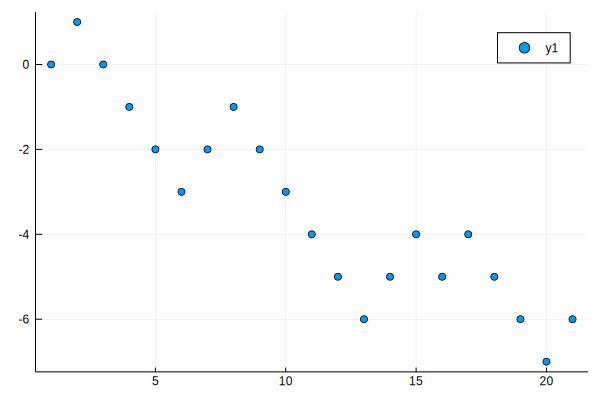

In [145]:
walkers = []

scatter(final_positions)

In [148]:
n = 20

walkers = [trajectory(n) for i in 1:1000]

final_positions = [traj[end] for traj in walkers];

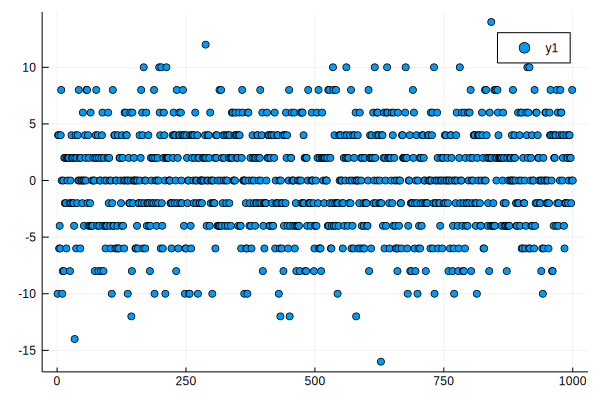

In [149]:
scatter(final_positions)

In [147]:
using Pkg;
Pkg.add("StatsBase")
using StatsBase  # do have to install

   Updating registry at `C:\Users\chuan\.julia\registries\General`
   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %.0 %

  Resolving package versions...
   Updating `C:\Users\chuan\.julia\environments\v1.4\Project.toml`
  [2913bbd2] + StatsBase v0.33.0
   Updating `C:\Users\chuan\.julia\environments\v1.4\Manifest.toml`
 [no changes]


In [150]:
counts = countmap(final_positions)

Dict{Int64,Int64} with 16 entries:
  -16 => 1
  2   => 160
  0   => 179
  -4  => 117
  10  => 13
  8   => 36
  6   => 74
  -6  => 79
  4   => 125
  -8  => 35
  -10 => 21
  14  => 1
  -12 => 4
  -2  => 153
  -14 => 1
  12  => 1

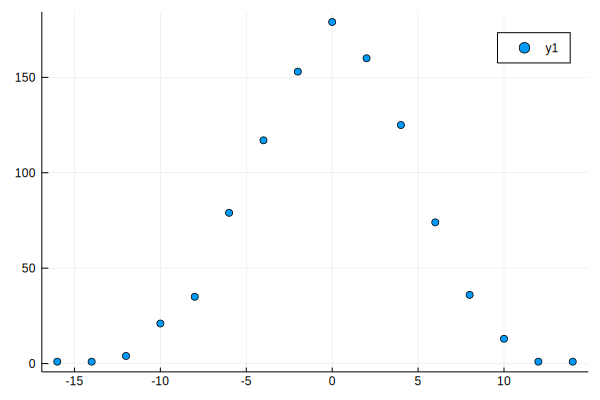

In [151]:
scatter(counts)

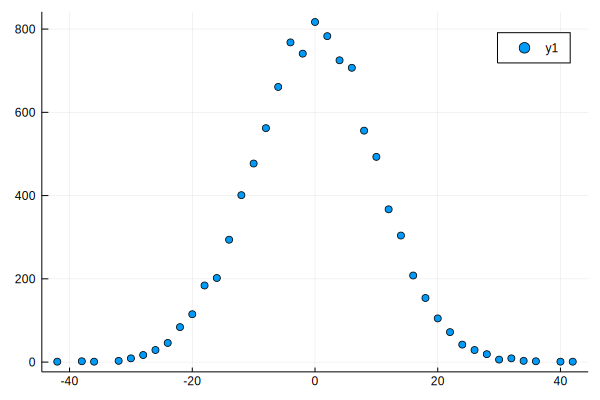

In [152]:
n = 100

num_walkers = 10_000

walkers = [trajectory(n) for i in 1:num_walkers]

final_positions = [traj[end] for traj in walkers];

counts = countmap(final_positions)

scatter(counts)

In [153]:
countmap()

MethodError: MethodError: no method matching countmap()
Closest candidates are:
  countmap(!Matched::AbstractArray{T,N} where N; alg) where T at C:\Users\chuan\.julia\packages\StatsBase\unDUx\src\counts.jl:389
  countmap(!Matched::AbstractArray{T,N} where N, !Matched::AbstractArray{W,1}) where {T, W<:Real} at C:\Users\chuan\.julia\packages\StatsBase\unDUx\src\counts.jl:390